In [1]:
# some_file.py
import sys
# insert at 1, 0 is the script path (or '' in REPL)
sys.path.insert(1, '/mnt/c/Users/Daniel/Dropbox/Research/Publications/ExaTrkX/heptrkx-gnn-tracking/')

import prepare
import torch
import numpy as np
import pandas as pd
import networkx as nx

In [3]:
t = torch.tensor([[1,2,5,3],[2,7,4,6],[2,5,1,9]])

In [4]:
t

tensor([[1, 2, 5, 3],
        [2, 7, 4, 6],
        [2, 5, 1, 9]])

In [31]:
torch.gather(t,-1,torch.tensor([[1,2,1,3],[2,3,0,1],[2,3,1,0]]))

tensor([[2, 5, 2, 3],
        [4, 6, 2, 7],
        [1, 9, 5, 2]])

In [35]:
torch.gather(t,0,torch.tensor([[0,0,2,1],[2,1,0,1],[2,1,0,1],[1,0,2,1]]))

tensor([[1, 2, 1, 6],
        [2, 7, 5, 6],
        [2, 7, 5, 6],
        [2, 2, 1, 6]])

In [67]:
event = pd.DataFrame()

In [5]:
with np.load('/mnt/c/Users/Daniel/Dropbox/Research/Publications/ExaTrkX/data/hitgraphs_small_000/event000001000_g000.npz') as data:
    eventX, eventy, eventRi_rows, eventRi_cols, eventRo_rows, eventRo_cols = data['X'], data['y'], data['Ri_rows'], data['Ri_cols'], data['Ro_rows'], data['Ro_cols']

In [89]:
eventX, eventy, eventRi_rows, eventRi_cols, eventRo_rows, eventRo_cols

(array([[ 0.03199581, -0.15061387, -0.0266578 ],
        [ 0.07257953, -0.16218117, -0.0603014 ],
        [ 0.11604285, -0.17535706, -0.0962638 ],
        ...,
        [ 0.03158715,  0.05145257,  0.0389963 ],
        [ 0.07280714,  0.06565178,  0.0966654 ],
        [ 0.11495709,  0.08035854,  0.155674  ]], dtype=float32),
 array([1., 0., 0., ..., 0., 0., 1.], dtype=float32),
 array([   1,    1,    1, ..., 1675, 1675, 1675]),
 array([   0,  123,  135, ..., 2744, 2872, 2893]),
 array([   0,    0,    0, ..., 1675, 1675, 1675]),
 array([   0,    1,    2, ..., 3545, 3546, 3547]))

In [6]:
len(eventX), len(eventy), len(eventRi_rows), len(eventRi_cols), len(eventRo_rows), len(eventRo_cols)

(1676, 5796, 5796, 5796, 5796, 5796)

In [7]:
n_edges = len(eventy)

In [8]:
edge_index=np.zeros((2,n_edges), dtype=int)

In [11]:
edge_index[0, eventRo_cols] = eventRo_rows

In [12]:
edge_index[1, eventRi_cols] = eventRi_rows

In [53]:
np.transpose(edge_index)[0:2000]

array([[   0,    1],
       [   0,   86],
       [   0,   92],
       ...,
       [1673, 1665],
       [1673, 1674],
       [   1,    2]])

In [47]:
G = nx.Graph()

In [48]:
G.add_edges_from(np.transpose(edge_index)[0:1000])

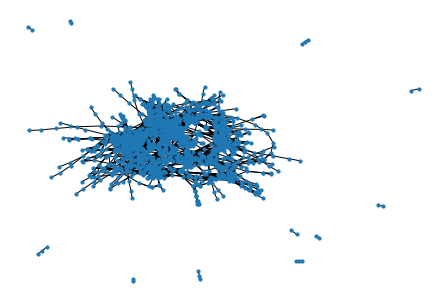

In [45]:
nx.draw(G, node_size=10)

In [49]:
pos = nx.spring_layout(G)

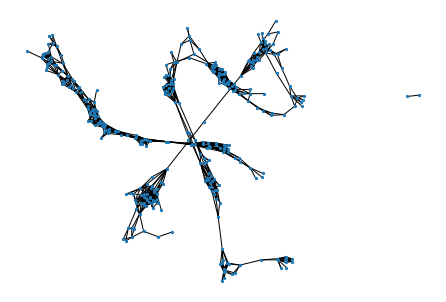

In [50]:
nx.draw(G,pos,node_size=5)